<a href="https://colab.research.google.com/github/ssubin29/KaggleStruggle/blob/main/digitRecognizer_useCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggle API 연동

In [ ]:
# API Token 다운받기
# 다운받은 API Token 업로드 하기
!pip install kaggle
from google.colab import files
files.upload()
# json 파일 옮겨주기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle

Saving kaggle.json to kaggle.json


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 필요한 모듈 임포트 & 데이터 불러오기

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
DATA_IN = '/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/'
import os
for dirname, _, filenames in os.walk(DATA_IN):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train_data = pd.read_csv(DATA_IN+"/train.csv")
test_data = pd.read_csv(DATA_IN+"/test.csv")
train_data.head()
train_data.info()

/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/train.csv
/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/test.csv
/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/sample_submission.csv
/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/test.csv.zip
/content/drive/MyDrive/Colab/KaggleStruggle/dataset/digitRecognizer/train.csv.zip
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


## 데이터 전처리 & 분할

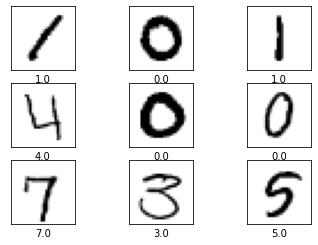

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [ ]:
X = np.array(train_data.drop("label", axis=1)).astype('float32')
y = np.array(train_data['label']).astype('float32')
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y[i])
plt.show()

X = X / 255.0
X = X.reshape(-1, 28, 28, 1)
y = to_categorical(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_test = np.array(test_data).astype('float32')
X_test = X_test / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
plt.figure(figsize=(10,10))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

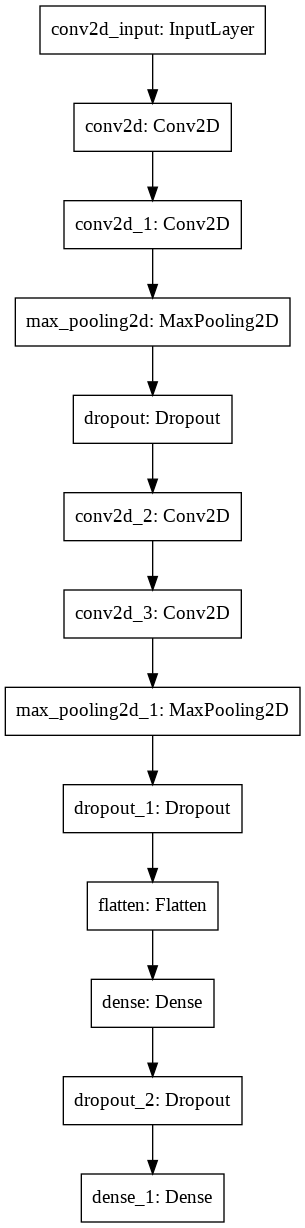

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png')

In [ ]:
#increse to epochs to 30 for better accuracy
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, batch_size=85, validation_data=(X_val, y_val))

Epoch 1/10
396/396 [==============================] - 245s 616ms/step - loss: 0.2865 - accuracy: 0.9060 - val_loss: 0.0683 - val_accuracy: 0.9781
Epoch 2/10
396/396 [==============================] - 243s 613ms/step - loss: 0.0842 - accuracy: 0.9745 - val_loss: 0.0458 - val_accuracy: 0.9863
Epoch 3/10
396/396 [==============================] - 243s 613ms/step - loss: 0.0612 - accuracy: 0.9810 - val_loss: 0.0378 - val_accuracy: 0.9877
Epoch 4/10
396/396 [==============================] - 243s 613ms/step - loss: 0.0522 - accuracy: 0.9839 - val_loss: 0.0374 - val_accuracy: 0.9889
Epoch 5/10
396/396 [==============================] - 241s 610ms/step - loss: 0.0435 - accuracy: 0.9870 - val_loss: 0.0313 - val_accuracy: 0.9905
Epoch 6/10
396/396 [==============================] - 239s 603ms/step - loss: 0.0376 - accuracy: 0.9891 - val_loss: 0.0270 - val_accuracy: 0.9912
Epoch 7/10
396/396 [==============================] - 239s 604ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.0342 -

In [ ]:
results=model.predict(X_train, batch_size=85)
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
#df.columns=['Label']
df.to_csv('results.csv', header=True)

In [ ]:
test_pred = pd.DataFrame(model.predict(X_test, batch_size=85))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


## Kaggle에 csv 파일 제출

In [ ]:
test_pred.to_csv('results.csv', header=True,index=False)
!kaggle competitions submit -c digit-recognizer -f results.csv -m "Message"

100% 208k/208k [00:01<00:00, 190kB/s]
Successfully submitted to Digit Recognizer